#with real liner codes augmentation

In [42]:
import keras
print('Keras version:', keras.__version__)

import sys
import os
import tensorflow as tf
print('TensorFlow version:', tf.__version__) 
from keras import backend as K
sess = tf.Session()
K.set_session(sess)
from keras.models import model_from_json
import pandas as pd
import numpy as np
import PIL

DEVICE = "/cpu:0"  # /use cpu:0 for cpu only or /gpu:0
working_dir = os.getcwd()
print("Working directory is:",working_dir)
sys.path.append(working_dir)  # To find local version of the library
import shutil
import csv
import random
import cv2

Keras version: 2.2.4
TensorFlow version: 1.12.0
Working directory is: C:\Users\is95217\PycharmProjects\source\turkishplate\_1 Container


In [43]:
windows=True

if windows:
    ROOT_DIR = os.path.join("C:/Users/is95217/PycharmProjects/source/turkishplate/_1 Container") 
    DATA_DIR = "C:/Users/is95217/data/container/container_default/siyah"  #win
    space = "C:/Users/is95217/data/container/container_default/spacewhite.png"
else:    
    ROOT_DIR = os.path.join("/home/user/Source/Evrim/Turkishplate")
    DATA_DIR = "/home/user/Source/data/dataEvrim/Original_15Kcrop_distributed"  #linux
sys.path.append(ROOT_DIR + "/Python")

import Augmcontainer as a

print("Data:", DATA_DIR)
print("Source code:", ROOT_DIR)

Data: C:/Users/is95217/data/container/container_default/siyah
Source code: C:/Users/is95217/PycharmProjects/source/turkishplate/_1 Container


In [44]:
#liner gerçek bilgilere ait liste oluştur.
dir_excel = 'C:/Users/is95217/PycharmProjects/source/turkishplate/_1 Container/'
dir_container = 'D:/container data/4straightgullseye -duz' 
ifile_name = 'liner.csv'

In [12]:
lst_real = a.create_real_list(dir_excel, dir_container,ifile_name)

55
101


In [13]:
len(lst_real)

146

In [14]:
r =random.choice(lst_real)
r

'ARK'

In [ ]:
DATA_DIR

In [ ]:
#black to white or visa versa
"""

try:
    img= cv2.imread(DATA_DIR + '/letters/v.PNG',0)
except:
    print("read error")
img2 = cv2.subtract(255, img) 
cv2.imwrite(DATA_DIR + '/letters/vx.PNG',img2)
"""

# Letter& Digit List generation

In [45]:
#create letter images and name list->  ex: a.png & A

#2.nd param harf=True,digit ise false
ltr_list=[]
ltr_list= a.create_list(DATA_DIR + '/letters',True,0,0) 

#2.nd param harf=True,digit ise false
dgt_list=[]
dgt_list= a.create_list(DATA_DIR + '/digits',False,100,199) 
#C:\Users\is95217\data\container\container_default\siyah

ltr_4th=[]
ltr_4th= a.create_list(DATA_DIR + '/4th',True,0,0) 

In [46]:
len(ltr_list),len(dgt_list),len(ltr_4th)

(137, 72, 6)

In [47]:
DATA_DIR

'C:/Users/is95217/data/container/container_default/siyah'

#      Random container number generation (Main)

# 1 first 3 letters ***************

In [ ]:
rnd_ltr= random.choice(lst_real)
len(rnd_ltr),rnd_ltr

In [ ]:
lst_num = [1,2,3,4]
xy=random.choice(lst_num)
xy

In [ ]:
lst=[]    
lst_num = [1,2,3,4]


for i in range(len(rnd_ltr)):
     xy=random.choice(lst_num)
     fname=  DATA_DIR + '/letters/' + rnd_ltr[i].lower() + str(xy) +'.PNG'
     lst.append(fname)   
     #print("result[i]:",fname)
        
        #buraya random number da üretilecek!!!!!! 23 may evrim
        #frame büyütüp büyük haliyle döndürülecek!!!


In [ ]:
rnd_ltr,lst

# 4th char U and space

In [ ]:
rnd_ltr4,lst4= a.rnd_list(ltr_4th, #harf_list
                        1, #howmany letters
                        DATA_DIR + '/4th',
                        0, # from 
                        len(ltr_4th))  #to
rnd_ltr4,lst4

In [ ]:
lst4.append(space)
lst4

# 2. 6 digits

In [ ]:

rnd_dgt0,lstd0= a.rnd_list(dgt_list,
                           6, #howmany letter or digits
                           DATA_DIR + '/digits',
                           0, #from
                           len(dgt_list)) #to                    
rnd_dgt0,lstd0

In [ ]:
lstd0.append(space)
lstd0

# 3 son rakam _rakamın çevresi kare

In [ ]:
result= int(rnd_dgt0)

#291828
#check digit generation
checkNumber = (int)(result / 11)
checkNumber
checkdigit = (int)(result - checkNumber * 11) % 10 
checkdigit

In [ ]:
xx= a.find_checkdigit(result)
xx

In [ ]:
"""
a=100+ checkdigit*10 
b=100+ checkdigit*10+9
a,b
"""

In [ ]:
dgt_list2=[]
dgt_list2= a.create_list(DATA_DIR + '/digits_kare',False, 100+ xx*10,100+xx*10+9) 

In [ ]:
dgt_list2,len(dgt_list2)

In [ ]:


dgt_list2=[]
dgt_list2= a.create_list(DATA_DIR + '/digits_kare',False, 100+ xx*10,100+xx*10+9) 
#for i in range(15):
    #print(dgt_list2[i][0][1:2])
#    dgt_list2[i][1] = dgt_list2[i][0][1:2]
    
#3. 1 digit (0 için 100-109, 1 için 111-119 ...)
rnd_dgt1,lstd1= a.rnd_list(dgt_list2,
                           1, #howmany digit to be random generated
                           DATA_DIR + '/digits_kare', #sadece son hane
                           0, 
                           len(dgt_list2))                    
rnd_dgt1,lstd1

In [ ]:
#4 ünü birleştir!! 

lst_merged = a.concat_list(DATA_DIR, lst + lst4 + lstd0 + lstd1 )
lst_merged

In [ ]:
out_dir = "D:/container data/outb/"

In [ ]:
#concatenate pic
a.img_concat( lst_merged,
              out_dir  ,  #directory
              rnd_ltr + rnd_ltr4 + rnd_dgt0 + rnd_dgt1  + '.jpg')


# %8 rotate için outb ve outb2

In [52]:
out_dir = "D:/container data/outb2/"
try:
    shutil.rmtree(out_dir)
    print("ok1")    
except:
    print("no dir1")
os.mkdir(out_dir)

    
out_dir = "D:/container data/outb/"
try:
    shutil.rmtree(out_dir)
    print("ok1")    
except:
    print("no dir1")
os.mkdir(out_dir)


ok1
ok1


In [53]:
out_dir = "D:/container data/outb/"
out_dir
cnt=1000

# soldan sağa normal görüntü

In [54]:
def pic_create(dirx,cnt):
    
    lst_num = [1,2,3,4]
    #lst_num = [1]
    for i in range(cnt): #test
        #1 first 3 letters ***************
        #return random letters and random pictures of letters.
        #inputs: ,   
        rnd_ltr= random.choice(lst_real)    
        lst=[]
        
        for i in range(len(rnd_ltr)):
            xy=random.choice(lst_num)
            fname=  DATA_DIR + '/letters/' + rnd_ltr[i].lower() + str(xy) +'.PNG'
            lst.append(fname)     


        rnd_ltr4,lst4= a.rnd_list(ltr_4th, #harf_list
                            1, #howmany letters
                            DATA_DIR + '/4th',
                            0, # from 
                            len(ltr_4th))  #to
        lst4.append(space)

        #2. 6 digits
        rnd_dgt0,lstd0= a.rnd_list(dgt_list,
                                   6, #howmany
                                   DATA_DIR + '/digits',
                                   0, 
                                   len(dgt_list))      
        lstd0.append(space)

        # son rakam _rakamın çevresi kare
        result= int(rnd_dgt0)
        checkdigit= a.find_checkdigit(result)

        dgt_list2=[] 
        dgt_list2= a.create_list(DATA_DIR + '/digits_kare',
                                 False, 
                                 100+ checkdigit*10,
                                 100+checkdigit*10+9) 
        #dgt_list2= a.create_list(DATA_DIR + '/digits_kare',False) 

        #3. 1 digit (0 için 100-109, 1 için 111-119 ...)
        rnd_dgt1,lstd1= a.rnd_list(dgt_list2,
                               1, #howmany digit to be random generated
                               DATA_DIR + '/digits_kare', #sadece son hane
                               0, 
                               len(dgt_list2))         

        lst_merged = a.concat_list(DATA_DIR, lst + lst4 + lstd0 + lstd1 )
        #print(lst_merged)
        print("1:", rnd_ltr + rnd_ltr4 +rnd_dgt0 + rnd_dgt1 )    


        #concatenate pic
        a.img_concat( lst_merged,
                      dirx  ,  #directory
                      rnd_ltr + rnd_ltr4 + rnd_dgt0 + rnd_dgt1  + '.jpg')


In [55]:
pic_create(out_dir,cnt)

1: PMSU3471105
PMSU3471105.jpg image saved in folder D:/container data/outb/
1: APRU6706051
APRU6706051.jpg image saved in folder D:/container data/outb/
1: BILU3727702
BILU3727702.jpg image saved in folder D:/container data/outb/
1: HMMU7036656
HMMU7036656.jpg image saved in folder D:/container data/outb/
1: HJMU2291322
HJMU2291322.jpg image saved in folder D:/container data/outb/
1: GESU5411890
GESU5411890.jpg image saved in folder D:/container data/outb/
1: ASLU6534121
ASLU6534121.jpg image saved in folder D:/container data/outb/
1: MAGU1443244
MAGU1443244.jpg image saved in folder D:/container data/outb/
1: MIEU6497128
MIEU6497128.jpg image saved in folder D:/container data/outb/
1: CSCU0013178
CSCU0013178.jpg image saved in folder D:/container data/outb/
1: GCNU7450421
GCNU7450421.jpg image saved in folder D:/container data/outb/
1: MFSU5591300
MFSU5591300.jpg image saved in folder D:/container data/outb/
1: MGLU2492303
MGLU2492303.jpg image saved in folder D:/container data/outb/

1: RODU3780876
RODU3780876.jpg image saved in folder D:/container data/outb/
1: MBSU0174328
MBSU0174328.jpg image saved in folder D:/container data/outb/
1: CSVU3546510
CSVU3546510.jpg image saved in folder D:/container data/outb/
1: LQLU1857801
LQLU1857801.jpg image saved in folder D:/container data/outb/
1: UNIU5661249
UNIU5661249.jpg image saved in folder D:/container data/outb/
1: MDLU9173142
MDLU9173142.jpg image saved in folder D:/container data/outb/
1: DALU7205308
DALU7205308.jpg image saved in folder D:/container data/outb/
1: CLHU6325275
CLHU6325275.jpg image saved in folder D:/container data/outb/
1: SKIU8641150
SKIU8641150.jpg image saved in folder D:/container data/outb/
1: BMOU0313192
BMOU0313192.jpg image saved in folder D:/container data/outb/
1: NTKU3801787
NTKU3801787.jpg image saved in folder D:/container data/outb/
1: QNLU1399948
QNLU1399948.jpg image saved in folder D:/container data/outb/
1: CAXU0546800
CAXU0546800.jpg image saved in folder D:/container data/outb/

1: BSIU7256073
BSIU7256073.jpg image saved in folder D:/container data/outb/
1: CRTU4330909
CRTU4330909.jpg image saved in folder D:/container data/outb/
1: CSFU3462261
CSFU3462261.jpg image saved in folder D:/container data/outb/
1: MRSU8742129
MRSU8742129.jpg image saved in folder D:/container data/outb/
1: CBHU1603932
CBHU1603932.jpg image saved in folder D:/container data/outb/
1: MFSU4392366
MFSU4392366.jpg image saved in folder D:/container data/outb/
1: ONEU4203540
ONEU4203540.jpg image saved in folder D:/container data/outb/
1: CCLU8496774
CCLU8496774.jpg image saved in folder D:/container data/outb/
1: GLDU4712378
GLDU4712378.jpg image saved in folder D:/container data/outb/
1: SLSU9721371
SLSU9721371.jpg image saved in folder D:/container data/outb/
1: CSMU4013757
CSMU4013757.jpg image saved in folder D:/container data/outb/
1: UACU1400377
UACU1400377.jpg image saved in folder D:/container data/outb/
1: MOLU3230854
MOLU3230854.jpg image saved in folder D:/container data/outb/

MSSU4853156.jpg image saved in folder D:/container data/outb/
1: MDLU6933058
MDLU6933058.jpg image saved in folder D:/container data/outb/
1: NTKU0581449
NTKU0581449.jpg image saved in folder D:/container data/outb/
1: DRNU5005308
DRNU5005308.jpg image saved in folder D:/container data/outb/
1: SOCU8209905
SOCU8209905.jpg image saved in folder D:/container data/outb/
1: TRHU5410691
TRHU5410691.jpg image saved in folder D:/container data/outb/
1: TCLU4408734
TCLU4408734.jpg image saved in folder D:/container data/outb/
1: APRU3299780
APRU3299780.jpg image saved in folder D:/container data/outb/
1: MRSU9771245
MRSU9771245.jpg image saved in folder D:/container data/outb/
1: HLCU9794576
HLCU9794576.jpg image saved in folder D:/container data/outb/
1: BEAU8264784
BEAU8264784.jpg image saved in folder D:/container data/outb/
1: EISU3425609
EISU3425609.jpg image saved in folder D:/container data/outb/
1: ONEU0110748
ONEU0110748.jpg image saved in folder D:/container data/outb/
1: SUDU7622373

CAXU4307589.jpg image saved in folder D:/container data/outb/
1: OCGU7415331
OCGU7415331.jpg image saved in folder D:/container data/outb/
1: MRSU6151090
MRSU6151090.jpg image saved in folder D:/container data/outb/
1: TGCU8762006
TGCU8762006.jpg image saved in folder D:/container data/outb/
1: UASU9084702
UASU9084702.jpg image saved in folder D:/container data/outb/
1: CRTU3834150
CRTU3834150.jpg image saved in folder D:/container data/outb/
1: CRSU2217974
CRSU2217974.jpg image saved in folder D:/container data/outb/
1: OOCU4300472
OOCU4300472.jpg image saved in folder D:/container data/outb/
1: MOLU3736436
MOLU3736436.jpg image saved in folder D:/container data/outb/
1: FSAU4246000
FSAU4246000.jpg image saved in folder D:/container data/outb/
1: GESU7139176
GESU7139176.jpg image saved in folder D:/container data/outb/
1: ONEU0878086
ONEU0878086.jpg image saved in folder D:/container data/outb/
1: SOCU2790766
SOCU2790766.jpg image saved in folder D:/container data/outb/
1: CRLU0917719

TGCU4809816.jpg image saved in folder D:/container data/outb/
1: KLCU1595473
KLCU1595473.jpg image saved in folder D:/container data/outb/
1: MBSU6586624
MBSU6586624.jpg image saved in folder D:/container data/outb/
1: CGMU3824470
CGMU3824470.jpg image saved in folder D:/container data/outb/
1: HJMU8369559
HJMU8369559.jpg image saved in folder D:/container data/outb/
1: MRGU0534765
MRGU0534765.jpg image saved in folder D:/container data/outb/
1: FSAU9010320
FSAU9010320.jpg image saved in folder D:/container data/outb/
1: CSLU3766730
CSLU3766730.jpg image saved in folder D:/container data/outb/
1: CSFU7134347
CSFU7134347.jpg image saved in folder D:/container data/outb/
1: CRSU0633149
CRSU0633149.jpg image saved in folder D:/container data/outb/
1: LSCU7443623
LSCU7443623.jpg image saved in folder D:/container data/outb/
1: SJLU3663363
SJLU3663363.jpg image saved in folder D:/container data/outb/
1: PMSU0031383
PMSU0031383.jpg image saved in folder D:/container data/outb/
1: HJCU3060178

MBSU5629020.jpg image saved in folder D:/container data/outb/
1: DAYU2680051
DAYU2680051.jpg image saved in folder D:/container data/outb/
1: CRLU7019045
CRLU7019045.jpg image saved in folder D:/container data/outb/
1: KKTU0271381
KKTU0271381.jpg image saved in folder D:/container data/outb/
1: RODU0386529
RODU0386529.jpg image saved in folder D:/container data/outb/
1: UASU7007726
UASU7007726.jpg image saved in folder D:/container data/outb/
1: MOLU4040839
MOLU4040839.jpg image saved in folder D:/container data/outb/
1: CZZU0218075
CZZU0218075.jpg image saved in folder D:/container data/outb/
1: ARKU7806414
ARKU7806414.jpg image saved in folder D:/container data/outb/
1: CICU1070487
CICU1070487.jpg image saved in folder D:/container data/outb/
1: CSLU7793478
CSLU7793478.jpg image saved in folder D:/container data/outb/
1: MOLU9402712
MOLU9402712.jpg image saved in folder D:/container data/outb/
1: CCLU5264149
CCLU5264149.jpg image saved in folder D:/container data/outb/
1: IMTU1213730

CRSU5117850.jpg image saved in folder D:/container data/outb/
1: CPSU2372128
CPSU2372128.jpg image saved in folder D:/container data/outb/
1: REYU1305161
REYU1305161.jpg image saved in folder D:/container data/outb/
1: COLU0231011
COLU0231011.jpg image saved in folder D:/container data/outb/
1: ANLU3104805
ANLU3104805.jpg image saved in folder D:/container data/outb/
1: CSVU1487046
CSVU1487046.jpg image saved in folder D:/container data/outb/
1: MOAU0344300
MOAU0344300.jpg image saved in folder D:/container data/outb/
1: NTKU0108340
NTKU0108340.jpg image saved in folder D:/container data/outb/
1: YMMU8774216
YMMU8774216.jpg image saved in folder D:/container data/outb/
1: YMLU4926130
YMLU4926130.jpg image saved in folder D:/container data/outb/
1: SZLU3194070
SZLU3194070.jpg image saved in folder D:/container data/outb/
1: FCIU5501782
FCIU5501782.jpg image saved in folder D:/container data/outb/
1: TCNU8149108
TCNU8149108.jpg image saved in folder D:/container data/outb/
1: QNLU8616960

RODU1644434.jpg image saved in folder D:/container data/outb/
1: FCIU0249007
FCIU0249007.jpg image saved in folder D:/container data/outb/
1: APRU1962675
APRU1962675.jpg image saved in folder D:/container data/outb/
1: MSSU0420398
MSSU0420398.jpg image saved in folder D:/container data/outb/
1: OCGU7262013
OCGU7262013.jpg image saved in folder D:/container data/outb/
1: BMOU4675100
BMOU4675100.jpg image saved in folder D:/container data/outb/
1: MFSU0044319
MFSU0044319.jpg image saved in folder D:/container data/outb/
1: CZZU4890193
CZZU4890193.jpg image saved in folder D:/container data/outb/
1: HJCU5700255
HJCU5700255.jpg image saved in folder D:/container data/outb/
1: HJMU8034741
HJMU8034741.jpg image saved in folder D:/container data/outb/
1: TRHU1002860
TRHU1002860.jpg image saved in folder D:/container data/outb/
1: ASLU3171762
ASLU3171762.jpg image saved in folder D:/container data/outb/
1: MIEU6433361
MIEU6433361.jpg image saved in folder D:/container data/outb/
1: KKTU3442000

In [ ]:
dy= 'D:/container data/deneme/'
for fname in os.listdir(dy):
    img = cv2.imread(dy + fname)
    img2 = cv2.resize(img, (0,0), fx = 0.5, fy = 0.5)
    cv2.imwrite(dy + fname,img2) 

# 128x64 resize 

In [56]:
#%80 zoom out
import matplotlib.pyplot as plt
datad = 'D:/container data/outb/'
outd = 'D:/container data/outb/'

for fname in os.listdir(datad):
    img = cv2.imread(datad + fname)
    zm1 = a.clipped_zoom(img, 0.9)       
     
    img = cv2.resize(zm1, (128, 64))
    cv2.imwrite(outd + fname,img)  

c:\users\is95217\appdata\local\programs\python\python36\lib\site-packages\scipy\ndimage\interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


# letters resize

In [41]:
datad = 'C:/Users/is95217/data/container/container_default/siyah/4th/'
outd  = 'C:/Users/is95217/data/container/container_default/siyah/4th/'

for fname in os.listdir(datad):
    img = cv2.imread(datad + fname)    
    try:
        img = cv2.resize(img, (64, 64))
    except:
        print("1")
    try:
        cv2.imwrite(outd + fname,img)  
    except:
        print("2")

# originals to 128x32

In [ ]:
datad = 'D:/container data/4straightgullseye -duz/'
outd  =  'D:/container data/4straightgullseye128x64/'   

for fname in os.listdir(datad):
    img = cv2.imread(datad + fname)     
    img = cv2.resize(img, (128, 64))
    cv2.imwrite(outd + fname,img)     

# augmenting the picture by rotating

In [57]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [58]:
#rotate %8
datagen = ImageDataGenerator(
              rotation_range=8,
              width_shift_range=0.01, #optimum = 0.01
              height_shift_range=0,  #optimum = 0
              shear_range=0, #makaslama
              zoom_range=0,
              #zoom_range=-0.2,              
              rescale=None,
              #cval=0,              
              horizontal_flip=False,  
              #preprocessing_function=AHE,
              fill_mode='nearest') #constant, nearest

D:/container data/outb/ADMU0686202.jpg
D:/container data/outb/ADMU1810468.jpg
D:/container data/outb/ADMU2134605.jpg
D:/container data/outb/ADMU2417415.jpg
D:/container data/outb/ADMU7874010.jpg
D:/container data/outb/AKLU1516702.jpg
D:/container data/outb/AKLU2246827.jpg
D:/container data/outb/AKLU2463054.jpg
D:/container data/outb/AKLU4014461.jpg
D:/container data/outb/AKLU4301924.jpg
D:/container data/outb/AKLU5343448.jpg
D:/container data/outb/AKLU7974670.jpg
D:/container data/outb/AKNU1801899.jpg
D:/container data/outb/AKNU2615228.jpg
D:/container data/outb/AKNU4272818.jpg
D:/container data/outb/AKNU4480289.jpg
D:/container data/outb/AKNU5646641.jpg
D:/container data/outb/AKNU6431502.jpg
D:/container data/outb/AKNU6973087.jpg
D:/container data/outb/AKNU7117946.jpg
D:/container data/outb/ALTU1330483.jpg
D:/container data/outb/ALTU7243797.jpg
D:/container data/outb/ALTU9166070.jpg
D:/container data/outb/AMFU1280851.jpg
D:/container data/outb/AMFU1735371.jpg
D:/container data/outb/AM

D:/container data/outb/COSU9749290.jpg
D:/container data/outb/CPSU1410794.jpg
D:/container data/outb/CPSU2372128.jpg
D:/container data/outb/CPSU3791986.jpg
D:/container data/outb/CRLU0742742.jpg
D:/container data/outb/CRLU0917719.jpg
D:/container data/outb/CRLU2088482.jpg
D:/container data/outb/CRLU3098470.jpg
D:/container data/outb/CRLU3230920.jpg
D:/container data/outb/CRLU7019045.jpg
D:/container data/outb/CRLU7744880.jpg
D:/container data/outb/CRLU9121300.jpg
D:/container data/outb/CRSU0633149.jpg
D:/container data/outb/CRSU0670660.jpg
D:/container data/outb/CRSU1212343.jpg
D:/container data/outb/CRSU1640727.jpg
D:/container data/outb/CRSU2217974.jpg
D:/container data/outb/CRSU2830080.jpg
D:/container data/outb/CRSU3531099.jpg
D:/container data/outb/CRSU3607307.jpg
D:/container data/outb/CRSU4861780.jpg
D:/container data/outb/CRSU5117850.jpg
D:/container data/outb/CRSU7054179.jpg
D:/container data/outb/CRSU7241663.jpg
D:/container data/outb/CRSU7717919.jpg
D:/container data/outb/CR

D:/container data/outb/GATU1973554.jpg
D:/container data/outb/GATU3187316.jpg
D:/container data/outb/GATU4020126.jpg
D:/container data/outb/GATU5379792.jpg
D:/container data/outb/GATU6028430.jpg
D:/container data/outb/GATU6271640.jpg
D:/container data/outb/GATU7711759.jpg
D:/container data/outb/GCNU0200035.jpg
D:/container data/outb/GCNU2087240.jpg
D:/container data/outb/GCNU3354098.jpg
D:/container data/outb/GCNU5437146.jpg
D:/container data/outb/GCNU7450421.jpg
D:/container data/outb/GCNU7801904.jpg
D:/container data/outb/GESU0329648.jpg
D:/container data/outb/GESU0393613.jpg
D:/container data/outb/GESU2444409.jpg
D:/container data/outb/GESU3273292.jpg
D:/container data/outb/GESU3702270.jpg
D:/container data/outb/GESU4202451.jpg
D:/container data/outb/GESU4716085.jpg
D:/container data/outb/GESU5411890.jpg
D:/container data/outb/GESU5701355.jpg
D:/container data/outb/GESU7139176.jpg
D:/container data/outb/GESU8008121.jpg
D:/container data/outb/GLDU1264472.jpg
D:/container data/outb/GL

D:/container data/outb/MFSU6063354.jpg
D:/container data/outb/MFSU7446593.jpg
D:/container data/outb/MFSU7681180.jpg
D:/container data/outb/MFSU7721318.jpg
D:/container data/outb/MFSU9424448.jpg
D:/container data/outb/MGLU0351000.jpg
D:/container data/outb/MGLU0772706.jpg
D:/container data/outb/MGLU1443024.jpg
D:/container data/outb/MGLU2492303.jpg
D:/container data/outb/MGLU4033359.jpg
D:/container data/outb/MGLU4144800.jpg
D:/container data/outb/MGLU4313749.jpg
D:/container data/outb/MGLU4648160.jpg
D:/container data/outb/MGLU6210039.jpg
D:/container data/outb/MGLU9181392.jpg
D:/container data/outb/MIEU6034380.jpg
D:/container data/outb/MIEU6433361.jpg
D:/container data/outb/MIEU6477020.jpg
D:/container data/outb/MIEU6497128.jpg
D:/container data/outb/MOAU0040755.jpg
D:/container data/outb/MOAU0344300.jpg
D:/container data/outb/MOAU0520751.jpg
D:/container data/outb/MOAU1543289.jpg
D:/container data/outb/MOAU2010514.jpg
D:/container data/outb/MOAU2794650.jpg
D:/container data/outb/MO

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


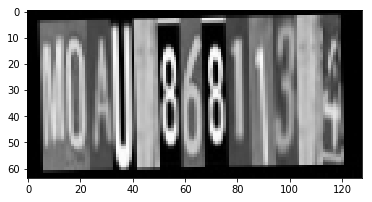

In [59]:
datad = 'D:/container data/outb/'
outd = 'D:/container data/outb2/'

for fname in os.listdir(datad):
    print(datad + fname)

    img = cv2.imread(datad + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.resize(img, (self.img_w, self.img_h))
    #img = cv2.resize(img, (128, 64))  
    cv2.imwrite(outd + fname,img)  
    a.rotate_img(img,outd,fname,datagen,64,128)

D:/container data/4straightgullseye128x64/ADMU4970424.T 20190315231932.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/ADMU4976762.3.jpg
D:/container data/4straightgullseye128x64/ADMU4976762.B 20190315232158.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/ADMU4976762.T 20190315232158.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/ADMU4980417.B 20190315231932.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/ADMU4980417.T 20190315231932.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/AKLU6509318.T 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/AMFU3228370.B 20190315233027.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/AMFU8925314.B 20190315232158.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/APHU6589430.2.jpg
D:/container data/4straightgullseye128x64/APHU6589430.B 20190315233117.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/APHU6622461.T 20190315231932.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/APHU6911

D:/container data/4straightgullseye128x64/BSIU3136370.T 20190315231932.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU4008630.B 20190315232435.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU4008630.T 20190315232435.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU4023001.B 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU4023001.T 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU9090506.T 20190315233539.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU9114022.B 20190315231932.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU9174253.B 20190315232435.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU9174253.T 20190315232435.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU9320018.B 20190315231932.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU9320018.T 20190315233117.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/BSIU9331460.B 20190315232553.jpg_1.2.jpg
D:/c

D:/container data/4straightgullseye128x64/CBHU8718423.T 20190315231933.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU8900438.B 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU8900839.B 20190315233028.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU8900839.T 20190315233028.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU8900939.B 20190315231933.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU8900939.T 20190315231933.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU8909409.B 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU8909409.T 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU8948215.T 20190315231933.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU9002182.T 20190315231933.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU9031030.B 20190315233552.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CBHU9031030.T 20190315233552.jpg_1.2.jpg
D:/c

D:/container data/4straightgullseye128x64/CMAU7456403.B 20190315233117.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CMAU7456403.T 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CMAU7553614.T 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CMAU7592098.B 20190315233117.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CMAU7592098.T 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CMAU8086345.B 20190315232158.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CMAU8086345.T 20190315232158.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CNCU1600711.B 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/COLU4374270.B 20190315233543.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/COLU4374270.L 20190315233543.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/COLU4374270.T 20190315233543.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/CPSU6417864.B 20190315232435.jpg_1.2.jpg
D:/c

D:/container data/4straightgullseye128x64/CZZU7466883.T 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DAYU6120589.B 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DAYU6120589.T 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DFSU1072919.B 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DFSU1072919.T 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DFSU1519988.B 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DFSU1519988.T 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DFSU1594180.3.jpg
D:/container data/4straightgullseye128x64/DFSU1594180.B 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DFSU1594180.B 20190315232159.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DFSU1594180.T 20190315231934.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/DFSU1596599.B 20190315233550.jpg_1.2.jpg
D:/container data/4straight

D:/container data/4straightgullseye128x64/FCIU2959484.B 20190315231935.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU2959484.T 20190315231935.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3315892.B 20190315231935.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3401500.T 20190315233118.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3434206.B 20190315233539.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3600502.B 20190315232159.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3600502.T 20190315232159.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3918617.B 20190315231935.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3918617.B 20190315232159.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3918617.T 20190315231935.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3967334.B 20190315231935.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/FCIU3967334.B 20190315233118 (2).jpg_1.2.jpg


D:/container data/4straightgullseye128x64/GESU1251263.T 20190315233118 (2).jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU1251263.T 20190315233118.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU2858138.L 20190315232435.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU2858138.R 20190315232435.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU3060461.B 20190315231935.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU3060461.L 20190315231935.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU3316384.B 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU3316384.L 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU3415535.B 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU3415535.L 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU3415535.R 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/GESU3415535.T 20190315232553.jpg_1.2.jpg


D:/container data/4straightgullseye128x64/HASU4074414.T 20190315231936.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HASU4223190.T 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HASU4240900.T 20190315231936.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HASU4240900.T 20190315233029.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HASU4254680.B 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HASU4254680.T 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HASU4309777.B 20190315233542.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HASU4309777.T 20190315233542.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HASU4451098.T 20190315231936.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HASU5183467.T 20190315233542.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HJCU8495383.B 20190315231936.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HJCU8495383.L 20190315231936.jpg_1.2.jpg
D:/c

D:/container data/4straightgullseye128x64/HLXU5210085.L 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU5210085.R 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU5210085.T 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU6517878.B 20190315233541.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU6517878.T 20190315233541.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU8024037.L 20190315233118.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU8024037.R 20190315233118.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU8024037.T 20190315233118.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU8030451.T 20190315231937.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU8200310.L 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU8200310.R 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/HLXU8219609.L 20190315231937.jpg_1.2.jpg
D:/c

D:/container data/4straightgullseye128x64/MEDU9032892.B 20190315231937.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MEDU9032892.L 20190315231937.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MEDU9032892.T 20190315231937.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MEDU9140027.B 20190315231937.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MEDU9140027.B 20190315233119.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MEDU9140027.L 20190315231937.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MEDU9140027.L 20190315233119.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MEDU9140027.T 20190315231937.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MEDU9140027.T 20190315233119.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MIEU3042343.T 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MOAU0609973.T 20190315231938.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MOAU0656764.T 20190315232159.jpg_1.2.jpg
D:/c

D:/container data/4straightgullseye128x64/MRKU6471697.T 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU7157335.B 20190315231938.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU7542809.B 20190315232200.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU7542809.L 20190315232200.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU7542809.R 20190315232200.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU7542809.T 20190315232200.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU7809768.L 20190315233542.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU7809768.R 20190315233542.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU7809768.T 20190315233542.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU8289151.L 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU8289151.R 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MRKU8289151.T 20190315232436.jpg_1.2.jpg
D:/c

D:/container data/4straightgullseye128x64/MSKU1300672.T 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU1374079.L 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU1374079.R 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU1896432.L 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU1896432.R 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU1896432.T 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU3451549.20190315231936.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU3451549.L 20190315231936.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU5618770.B 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU5618770.L 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU5618770.R 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/MSKU5618770.T 20190315231939.jpg_1.2.jpg
D:/con

D:/container data/4straightgullseye128x64/OOCU7449993.T 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOCU7547937.L 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOCU7547937.R 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOCU7547937.T 20190315232553.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOCU7892764.L 20190315233119.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOCU7892764.R 20190315233119.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOCU7892764.T 20190315233119.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOLU1103931.B 20190315232200.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOLU1344163.B 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOLU1344163.B 20190315233119.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOLU1344163.L 20190315231939.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/OOLU1344163.L 20190315233119.jpg_1.2.jpg
D:/c

D:/container data/4straightgullseye128x64/SEGU1953789.2.jpg
D:/container data/4straightgullseye128x64/SEGU1953789.B 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU1953789.B 20190315233029.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU1953789.T 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU1953789.T 20190315233029.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU2105503.B 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU2105503.L 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU2105503.T 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU2829941.B 20190315233545.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU2829941.T 20190315233546.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU3169987.B 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/SEGU3169987.T 20190315231940.jpg_1.2.jpg
D:/container data/4straight

D:/container data/4straightgullseye128x64/TCLU1973568.B 20190315233541.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2059496.B 20190315233550.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2059496.T 20190315233550.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2565555.T 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2633442.B 20190315233120.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2633442.T 20190315233120.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2633449.B 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2633449.T 20190315231940.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2865731.T 20190315231941.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2866536.B 20190315231941.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2866538.B 20190315232200.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCLU2866538.B 20190315233120.jpg_1.2.jpg
D:/c

D:/container data/4straightgullseye128x64/TCNU2695432.B 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU2695432.T 20190315232436.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU2734821.B 20190315231941.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU3066012.T 20190315232200.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU3075288.B 20190315231941.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU3075288.T 20190315231941.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU3134415.B 20190315231941.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU3134415.T 20190315231941.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU3195703.B 20190315233541.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU3195703.T 20190315233541.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU3472731.T 20190315232554.jpg_1.2.jpg
D:/container data/4straightgullseye128x64/TCNU3584095.B 20190315231941.jpg_1.2.jpg
D:/c

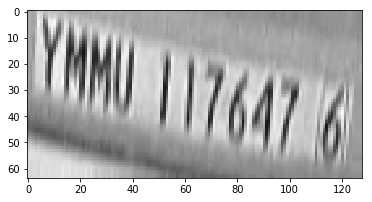

In [8]:
datad = 'D:/container data/4straightgullseye128x64/'
outd = 'D:/container data/4straightgullseye128x64/'

for fname in os.listdir(datad):
    print(datad + fname)

    img = cv2.imread(datad + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.resize(img, (self.img_w, self.img_h))
    #img = cv2.resize(img, (128, 64))  
    #cv2.imwrite(outd + fname,img)  
    a.rotate_img(img,outd,fname,datagen,64,128)

# %20 rotate için

In [ ]:
out_dir = "D:/container data/outb3/"
try:
    shutil.rmtree(out_dir)
    print("ok1")    
except:
    print("no dir1")
os.mkdir(out_dir)

    
out_dir = "D:/container data/outb4/"
try:
    shutil.rmtree(out_dir)
    print("ok1")    
except:
    print("no dir1")
os.mkdir(out_dir)

In [ ]:
out_dir = "D:/container data/outb3/"
pic_create(out_dir,cnt)

In [ ]:
#%70 zoom out
import matplotlib.pyplot as plt
datad = 'D:/container data/outb3/'
outd = 'D:/container data/outb3/'

for fname in os.listdir(datad):
    img = cv2.imread(datad + fname)

    zm1 = a.clipped_zoom(img, 0.7)
    
    img = cv2.resize(zm1, (128, 32))
    cv2.imwrite(outd + fname,img)  

In [ ]:
#rotate %20
datagen = ImageDataGenerator(
              rotation_range=15,
              width_shift_range=0.01, #optimum = 0.01
              height_shift_range=0,  #optimum = 0
              shear_range=0, #makaslama
              zoom_range=0,
              #zoom_range=-0.2,              
              rescale=None,
              #cval=0,              
              horizontal_flip=False,  
              #preprocessing_function=AHE,
              fill_mode='nearest') #constant, nearest

In [ ]:
datad = 'D:/container data/outb3/'
outd = 'D:/container data/outb4/'

for fname in os.listdir(datad):
    print(datad + fname)

    img = cv2.imread(datad + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.resize(img, (self.img_w, self.img_h))
    img = cv2.resize(img, (128, 32))  
    cv2.imwrite(outd + fname,img)  
    a.rotate_img(img,outd,fname,datagen)

# sola yatık liste

In [ ]:
out_dir = 'D:/container data/out4/'

In [ ]:
ltr_list=[]
ltr_list= a.create_list(DATA_DIR + 'container_default/letters_sola',True) 
dgt_list=[]
dgt_list= a.create_list(DATA_DIR + 'container_default/digits_sola',False) 

In [ ]:
for i in range(1000): #test
    #1 first 4 letters ***************
    #return random letters and random pictures of letters.
    #inputs: ,     
    rnd_ltr,lst= a.rnd_list(ltr_list, #harf_list
                            4, #howmany letters
                            DATA_DIR + 'container_default/letters_sola',
                            0, # from 
                            len(ltr_list))  #to
    
    #2. 6 digits 
    rnd_dgt0,lstd0= a.rnd_list(dgt_list,
                               6, #howmany                               
                               DATA_DIR + 'container_default/digits_sola',
                               0, 
                               len(dgt_list))      
    
    # son rakam _rakamın çevresi kare
    dgt_list2=[]
    dgt_list2= a.create_list(DATA_DIR + 'container_default/digits_solakare',False) 

    #3. 1 digit (0 için 100-109, 1 için 111-119 ...)
    rnd_dgt1,lstd1= a.rnd_list(dgt_list2,
                           1, #howmany digit to be random generated
                           DATA_DIR + 'container_default/digits_solakare', #sadece son hane
                           0, 
                           len(dgt_list2))         

    lst_merged = a.concat_list(DATA_DIR, lst + lstd0 + lstd1 )
    #print(lst_merged)
    print(rnd_ltr + rnd_dgt0 + rnd_dgt1 )    


    #concatenate pic
    a.img_concat( lst_merged,
                  out_dir  ,  #directory
                  rnd_ltr + rnd_dgt0 + rnd_dgt1  + '.jpg')


# 32:128 resize 

In [ ]:

import cv2
#datad = 'C:\Users\is95217\data\container\container_default\beyaz\letters'

datad = 'C:/Users/is95217/data/container/container_default/beyaz/digits_kare/'
outd = 'C:/Users/is95217/data/container/container_default/beyaz/digits_kare1/'
for fname in os.listdir(datad):
    print(datad + fname)

    img = cv2.imread(datad + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.resize(img, (self.img_w, self.img_h))
    img = cv2.resize(img, (32, 128))  
    cv2.imwrite(outd + fname,img)  